<a href="https://colab.research.google.com/github/freedom73011/Python-01/blob/main/ch10%E5%8F%B0%E7%81%A3%E8%82%A1%E7%A5%A8%E5%B8%82%E5%A0%B4%E5%88%86%E6%9E%90%E7%B5%B1%E8%A8%88%E5%9C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 取得單月股票資料

In [ ]:
import pandas as pd

url = 'https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20230101&stockNo=2317&response=html'
df = pd.read_html(url, header=1)[0]
df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,112/01/03,47341828,4674470643,99.9,99.9,98.0,99.1,-0.8,37746
1,112/01/04,42812802,4206947798,98.0,98.7,98.0,98.1,-1.0,34793
2,112/01/05,37046103,3637807642,98.1,98.9,98.0,98.0,-0.1,26593
3,112/01/06,20649438,2035341101,98.3,98.8,98.3,98.4,0.4,16660
4,112/01/09,34166209,3390702893,99.2,99.6,98.9,99.1,0.7,19622
5,112/01/10,21706054,2157139787,99.4,99.8,99.1,99.4,0.3,10304
6,112/01/11,22096447,2195950633,99.8,99.8,99.1,99.1,-0.3,10725
7,112/01/12,22014869,2179239269,99.1,99.5,98.6,98.6,-0.5,15225
8,112/01/13,18652790,1845839426,99.0,99.5,98.6,98.6,0.0,11985
9,112/01/16,32736172,3226475964,98.6,99.2,98.1,98.1,-0.5,24717


## 自訂日期格式轉換函式

In [ ]:
def convertDate(date):  #轉換民國日期為西元
    str1 = str(date)
    yearstr = str1[:3]  #取出民國年
    realyear = str(int(yearstr) + 1911)  #轉為西元年
    realdate = realyear + str1[4:6] + str1[7:9]  #組合日期
    return realdate

print(convertDate('112/05/02'))

20230502


## 全年個股單月網址

In [ ]:
def twodigit(n):  #將數值轉為二位數字串
    if(n < 10):
        retstr = '0' + str(n)
    else:
        retstr = str(n)
    return retstr

urlbase = 'http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=2023'  #網址前半
urltail = '01&stockNo=2317&_=1521363562193'  #網址後半
for i in range(1, 13):  #取1到12數字
    url_twse = urlbase + twodigit(i) + urltail  #組合網址
    print(url_twse)

http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20230101&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20230201&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20230301&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20230401&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20230501&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20230601&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20230701&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20230801&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20230901&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?respons

## 結合月份資料

In [ ]:
import pandas as pd

url01 = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20230101&stockNo=2317'
url02 = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20230201&stockNo=2317'
df1 = pd.read_html(url01, header=1)[0]
df2 = pd.read_html(url02, header=1)[0]
df = pd.concat([df1, df2], ignore_index=True)
df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,112/01/03,47341828,4674470643,99.9,99.9,98.0,99.1,-0.8,37746
1,112/01/04,42812802,4206947798,98.0,98.7,98.0,98.1,-1.0,34793
2,112/01/05,37046103,3637807642,98.1,98.9,98.0,98.0,-0.1,26593
3,112/01/06,20649438,2035341101,98.3,98.8,98.3,98.4,0.4,16660
4,112/01/09,34166209,3390702893,99.2,99.6,98.9,99.1,0.7,19622
5,112/01/10,21706054,2157139787,99.4,99.8,99.1,99.4,0.3,10304
6,112/01/11,22096447,2195950633,99.8,99.8,99.1,99.1,-0.3,10725
7,112/01/12,22014869,2179239269,99.1,99.5,98.6,98.6,-0.5,15225
8,112/01/13,18652790,1845839426,99.0,99.5,98.6,98.6,0.0,11985
9,112/01/16,32736172,3226475964,98.6,99.2,98.1,98.1,-0.5,24717


## 單月個股統計圖

In [ ]:
# 下載中文字形
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2024-02-10 19:58:57--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.201.138, 74.125.201.102, 74.125.201.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.201.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-02-10 19:58:57--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.103.132, 2607:f8b0:4001:c2b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.103.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  44.0MB/s    in 0.4s    

2024-02-10 19:5

<ipython-input-4-ec16901739bd>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdstock['日期'][i] = convertDate(pdstock['日期'][i])


<Axes: xlabel='日期'>

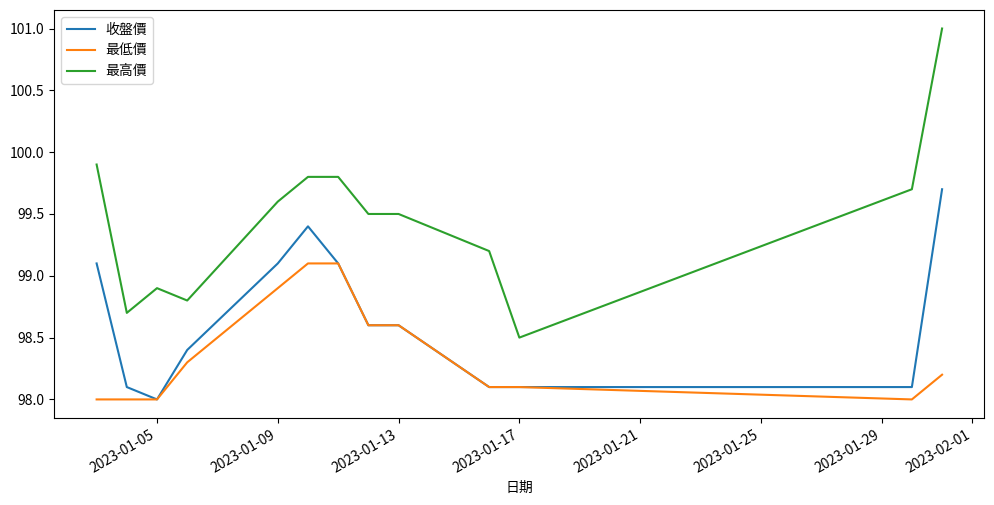

In [ ]:
def convertDate(date):  #轉換民國日期為西元
    str1 = str(date)
    yearstr = str1[:3]  #取出民國年
    realyear = str(int(yearstr) + 1911)  #轉為西元年
    realdate = realyear + str1[4:6] + str1[7:9]  #組合日期
    return realdate

import requests
import csv
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf') #設定中文字型
matplotlib.rc('font', family='Taipei Sans TC Beta')
filepath = 'stockmonth01.csv'
if not os.path.isfile(filepath):  #如果檔案不存在就建立檔案
  url = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20230101&stockNo=2317'
  df = pd.read_html(url, header=1)[0]
  df.to_csv(filepath, encoding='utf-8', index=False)

pdstock = pd.read_csv(filepath, encoding='utf-8')  #以pandas讀取檔案
for i in range(len(pdstock['日期'])):  #轉換日期式為西元年格
    pdstock['日期'][i] = convertDate(pdstock['日期'][i])
pdstock['日期'] = pd.to_datetime(pdstock['日期'])  #轉換日期欄位為日期格式
pdstock.plot(kind='line', figsize=(12, 6), x='日期', y=['收盤價', '最低價', '最高價'])  #繪製統計圖

## 全年個股統計圖

<ipython-input-8-22d1e4c4c13f>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdstock['日期'][i] = convertDate(pdstock['日期'][i])


<Axes: xlabel='日期'>

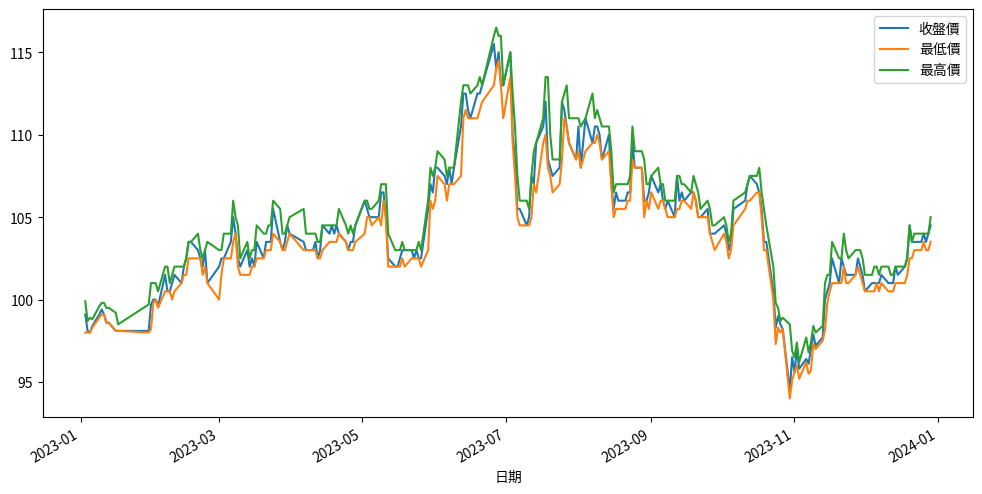

In [ ]:
def twodigit(n):  #將數值轉為二位數字串
    if(n < 10):
        retstr = '0' + str(n)
    else:
        retstr = str(n)
    return retstr

def convertDate(date):  #轉換民國日期為西元
    str1 = str(date)
    yearstr = str1[:3]  #取出民國年
    realyear = str(int(yearstr) + 1911)  #轉為西元年
    realdate = realyear + str1[4:6] + str1[7:9]  #組合日期
    return realdate

import requests
import csv
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf') #設定中文字型
matplotlib.rc('font', family='Taipei Sans TC Beta')
urlbase = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=2023'  #網址前半
urltail = '01&stockNo=2317'  #網址後半
filepath = 'stockyear2023.csv'

dfall = pd.DataFrame() # 新增空的DataFrame
if not os.path.isfile(filepath):  #如果檔案不存在就建立檔案
    for i in range(1, 13):  #取1到12數字
        url_twse = urlbase + twodigit(i) + urltail  #組合網址
        dftemp = pd.read_html(url_twse, header=1)[0]
        dfall = pd.concat([dfall, dftemp], ignore_index=True)
        time.sleep(2)
    dfall.to_csv(filepath, encoding='utf-8', index=False)

pdstock = pd.read_csv(filepath, encoding='utf-8')  #以pandas讀取檔案
for i in range(len(pdstock['日期'])):  #轉換日期式為西元年格式
    pdstock['日期'][i] = convertDate(pdstock['日期'][i])
pdstock['日期'] = pd.to_datetime(pdstock['日期'])  #轉換日期欄位為日期格式
pdstock.plot(kind='line', figsize=(12, 6), x='日期', y=['收盤價', '最低價', '最高價'])  #繪製統計圖

## 以 plotly 繪製全年個股統計圖

In [ ]:
def twodigit(n):  #將數值轉為二位數字串
    if(n < 10):
        retstr = '0' + str(n)
    else:
        retstr = str(n)
    return retstr

def convertDate(date):  #轉換民國日期為西元
    str1 = str(date)
    yearstr = str1[:3]  #取出民國年
    realyear = str(int(yearstr) + 1911)  #轉為西元年
    realdate = realyear + str1[4:6] + str1[7:9]  #組合日期
    return realdate

import requests
import csv
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import fontManager
import plotly.graph_objects as go

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf') #設定中文字型
matplotlib.rc('font', family='Taipei Sans TC Beta')
urlbase = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=2023'  #網址前半
urltail = '01&stockNo=2317'  #網址後半
filepath = 'stockyear2023.csv'

dfall = pd.DataFrame() # 新增空的DataFrame
if not os.path.isfile(filepath):  #如果檔案不存在就建立檔案
    for i in range(1, 13):  #取1到12數字
        url_twse = urlbase + twodigit(i) + urltail  #組合網址
        dftemp = pd.read_html(url_twse, header=1)[0]
        dfall = pd.concat([dfall, dftemp], ignore_index=True)
        time.sleep(2)
    dfall.to_csv(filepath, encoding='utf-8', index=False)

pdstock = pd.read_csv(filepath, encoding='utf-8')  #以pandas讀取檔案
for i in range(len(pdstock['日期'])):  #轉換日期式為西元年格式
    pdstock['日期'][i] = convertDate(pdstock['日期'][i])
pdstock['日期'] = pd.to_datetime(pdstock['日期'])  #轉換日期欄位為日期格式

f = go.Figure()
f.add_trace(go.Scatter(x=pdstock['日期'], y=pdstock['收盤價'], name='收盤價'))
f.add_trace(go.Scatter(x=pdstock['日期'], y=pdstock['最低價'], name='最低價'))
f.add_trace(go.Scatter(x=pdstock['日期'], y=pdstock['最高價'], name='最高價'))
f.update_layout(title='2023年個股統計圖', showlegend=True)
f.show()